# Google Data Analytics Professional Certificate Capstone Project:

## CYCLISTIC BIKE-SHARE ANALYSIS

# INTRODUCTION

In this case study, i will be working as a data analyst for  **CYCLISTIC**, a bike-share company based in Chicago, USA. 
CYCLISTIC has over **5,800 bicycles** that
are geotracked and locked into a network of **692** stations across Chicago. 

There are two types of CYCLISTIC users, those who subscribe to the annual membership and those who purchase the casual tickets. The marketing team believes that increasing the number of users with annual membership will be key to the future growth of the company. However, istead of lauching a marketing campaign to get new members, the team has decided to look into converting casual members into annual members.

I have been tasked with the responsibility of carrying out an analysis to understand how casual riders and annual members use Cyclistic bikes differently. 
furthermore, the team would love to get recommemndations from the insights to enable them design a new marketing strategy to convert casual riders into annual members.

To achieve success in my analysis, i have followed the **6 steps of data analysis process** taught in the google data analytics course, these steps are:

    (1) Ask 
    (2) Prepare 
    (3) Process 
    (4) Analyze 
    (5) Share 
    (6) Act




# 1. ASK

### BUSINESS TASK : How do annual members and casual riders use Cyclistic bikes differently?


The ask phase of the data analytics process asking the right questions that would help with the given task.

To get further insights towards finding a solution to the task, i have formulated few questions that would reveal some trends and patterns, these questions are:

    i) WHAT IS THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE?

    ii) WHAT IS THE TOTAL NUMBER OF RIDES IN EACH MONTH? 

    iii) WHAT IS THE TOTAL NUMBER OF RIDES BY DAY?

    iv) WHAT IS THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE BY DAY?

    v) WHAT IS THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE BY MONTH?

    vi) WHAT ARE THE BIKE PREFERENCES BY USER TYPE?

    vii) WHAT ARE THE TOP 5 START AND END STATIONS BY USER TYPE?
    
    viii) WHAT IS TOTAL NUMBER OF EACH BIKE TYPE USED BY EACH MEMBERSHIP TYPE EVERY MONTH?


# 2. PREPARING THE DATA

The prepare phase of the data analytics phase involves the collection and preparation of the data based of good ethical considerations like: where the data was collected, The quality of the data, how recent the data is and how the data protects the privacy of people's information.

The data used in this analysis was collected from CYCLISTIC by Motivate International Inc. The data used is very recent and contains data from the last **12 months**. The data collected was scrutinized and is found to be **unbiased**. The data-privacy issues prohibits the usage of riders’ personally identifiable information. 

# 3. PROCESSING THE DATA

Data processing involves the collection, transformation and cleaning of the dataset so that the data will be consistent and credible.

This process involves:
    i) Importing each dataset for the 12 months and merging them into 1 dataset.
    ii) Checking for missing values
    iii) Formatting some columns to the correct dataset.
    
**NOTE**: Before importing the datasets, i added 2 extra column using Excel to each of the 12 sheets, the 2 extra columns are **"day_of_week"** (The day of the week the rider used the bike) and the **"ride_length"** (the duration of the ride from start to finish).

#### IMPORTING ALL THE NECESSARY LIBRARIES

PANDAS: Pandas is the standard python library for data manipulation and analysis.

MATPLOTLIB: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

OS: The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

SEABORN: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

DATETIME: The datetime module supplies classes for manipulating dates and times.

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime as dt
import numpy as np

#### LOADING ALL THE DATASETS FROM THE LOCATION OF THE FILES. THIS IS DONE BY SETTING THE FILE PATH WHERE THE DATASETS ARE LOCATED FIRST AND THEN LOADING THEM.

In [2]:
path = "./COPY_Bike_Sharing_CSV_1121_to_1022_mmyy/"

In [5]:
files = [f for f in os.listdir(path)]
files

['202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202208-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv',
 '202210-divvy-tripdata.csv']

### COMBINING ALL 12 DATASETS INTO ONE DATASET CALLED all_data

In [7]:
all_data = pd.DataFrame()

for f in files:
    df = pd.read_csv(path + f)
    all_data = pd.concat([all_data, df])

#### VIEWING INFORMATION ABOUT THE DATASET

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5755694 entries, 0 to 558684
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   day_of_week         int64  
 5   ride_length         object 
 6   start_station_name  object 
 7   start_station_id    object 
 8   end_station_name    object 
 9   end_station_id      object 
 10  start_lat           float64
 11  start_lng           float64
 12  end_lat             float64
 13  end_lng             float64
 14  member_casual       object 
dtypes: float64(4), int64(1), object(10)
memory usage: 702.6+ MB


#### VIEWING THE SHAPE (NUMBER OF ROWS, NUMBER OF COLUMNS) OF THE DATASET

In [11]:
all_data.shape

(5755694, 15)

##### THERE ARE 5,755,694 ROWS OF DATA AND 15 COLUMNS IN THE COMBINED DATASET (all_data)

### CHECKING FOR MISSING VALUES

In [388]:
all_data.isnull().sum()

rideable_type              0
started_at                 0
ended_at                   0
day_of_week                0
ride_length                0
start_station_name    878177
start_station_id      878177
end_station_name      940010
end_station_id        940010
start_lat                  0
start_lng                  0
end_lat                 5835
end_lng                 5835
member_casual              0
months                     0
length                     0
dtype: int64

#### There are over 878,000 rows of missing data each from the start_station_name and start_station_id. and over 900,000 rows of missing data each from the end_station_name and end_station_id, and also over 5,000 rows of missing data each from the end_lat and end_lng columns.

**ALL OTHER COLUMNS HAVE COMPLETE ROWS OF DATA.**

**THEREFORE**, i will not be deleting any rows with from the columns with missing data because they do not affect my analysis based on the initial analysis questions in the ask phase of this analysis.

#### VIEWING THE FIRST 10 ENTRIES OF THE DATASET

In [131]:
all_data.head()

,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,months,length
0,electric_bike,2021-11-27 13:27:00,2021-11-27 13:46:00,6,0:19:00,NaN,NaN,NaN,NaN,41.93,-87.72,41.96,-87.73,casual,11,0 days 00:19:00
1,electric_bike,2021-11-27 13:38:00,2021-11-27 13:56:00,6,0:17:45,NaN,NaN,NaN,NaN,41.96,-87.70,41.92,-87.70,casual,11,0 days 00:18:00
2,electric_bike,2021-11-26 22:03:00,2021-11-26 22:05:00,5,0:02:22,NaN,NaN,NaN,NaN,41.96,-87.70,41.96,-87.70,casual,11,0 days 00:02:00
3,electric_bike,2021-11-27 09:56:00,2021-11-27 10:01:00,6,0:05:01,NaN,NaN,NaN,NaN,41.94,-87.79,41.93,-87.79,casual,11,0 days 00:05:00
4,electric_bike,2021-11-26 19:09:00,2021-11-26 19:30:00,5,0:21:13,NaN,NaN,NaN,NaN,41.90,-87.63,41.88,-87.62,casual,11,0 days 00:21:00


### FORMATING COLUMNS TO THE CORRECT DATA TYPE

In [44]:
all_data["started_at"] = pd.to_datetime(all_data["started_at"])

all_data["ended_at"] = pd.to_datetime(all_data["ended_at"])

#### THE "started_at" AND "ended_at" COLUMNS WERE in the "OBJECT" DATA TYPE, THEY HAVE BEEN CONVERTED TO "DATETIME" FORMAT.

#### THE "ride_id" COLUMN IS NOT IMPORTANT IN THE ANALYSIS, SO IT WILL BE DROPPED.

In [46]:
all_data.drop(["ride_id" ], axis = 1, inplace =  True)

### EXTRACTING THE MONTHS OF EACH RIDE INTO A NEW COLUMN CALLED "months"

In [54]:
all_data["months"] = all_data["started_at"].dt.month

# 4. ANALYZING THE DATASET

The analyze phase of the data analytics process comes after processing and cleaning up the dataset. It involves carry out analysis on the dataset to answer business questions or confirm or answer formulated hypotheses.
In this phase, we will be analyze and find insights to our formulated questions in the ASK phase.

### i) ANALYZING THE TOTAL NUMBER OF RIDES  BY EACH USER TYPE?

In [418]:
all_data.groupby("member_casual").count()['rideable_type']

member_casual
casual    2353033
member    3402661
Name: rideable_type, dtype: int64

In [576]:
tot_num = all_data.groupby("member_casual").count()['rideable_type'].reset_index()

In [624]:
tot_num.rename({"member_casual": "Membership Type", 'rideable_type': "count"}, inplace = True, axis = 1)

In [627]:
tot_num

,Membership Type,count
0,casual,2353033
1,member,3402661


### PLOTTING THE TOTAL NUMBER OF RIDES  BY EACH USER TYPE?

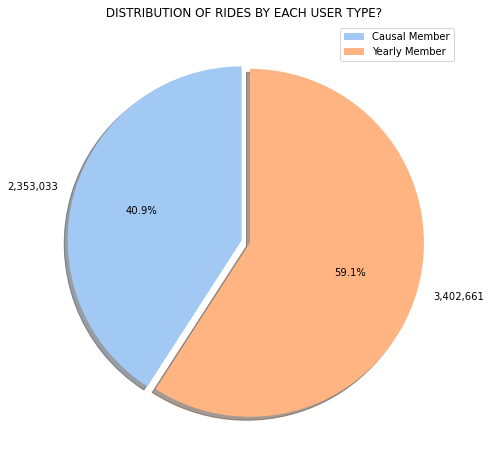

In [640]:
plt.figure(figsize = (20, 8))
color = sns.color_palette("pastel")
plt.pie(tot_num["count"], labels = ["2,353,033", "3,402,661"], autopct='%.1f%%' , startangle=90,
        shadow= True, colors = color, explode =  [0, 0.05])

plt.legend(labels = ["Causal Member", "Yearly Member"], loc = 1)
plt.title(" DISTRIBUTION OF RIDES BY EACH USER TYPE?")
plt.show()


### ii) THE TOTAL NUMBER OF RIDES IN EACH MONTH

In [438]:
ride_per_month = pd.DataFrame(all_data["months"].value_counts()).reset_index()
ride_per_month


,index,months
0,7,682109
1,8,657106
2,6,650332
3,9,634573
4,5,621063
5,10,539547
6,4,418104
7,3,372685
8,11,348653
9,12,314320


In [439]:
ride_per_month.rename({"index": "months", "months": "rides"}, axis = 1, inplace = True)

In [440]:
ride_per_month

,months,rides
0,7,682109
1,8,657106
2,6,650332
3,9,634573
4,5,621063
5,10,539547
6,4,418104
7,3,372685
8,11,348653
9,12,314320


In [408]:
all_data.groupby("months").count()["rideable_type"] #CAN ALSO BE DONE WITH THE GROUPBY AND COUNT FUNCTIONS

months
1     254290
2     262912
3     372685
4     418104
5     621063
6     650332
7     682109
8     657106
9     634573
10    539547
11    348653
12    314320
Name: rideable_type, dtype: int64

### PLOTING THE TOTAL NUMBER OF RIDES IN EACH MONTH

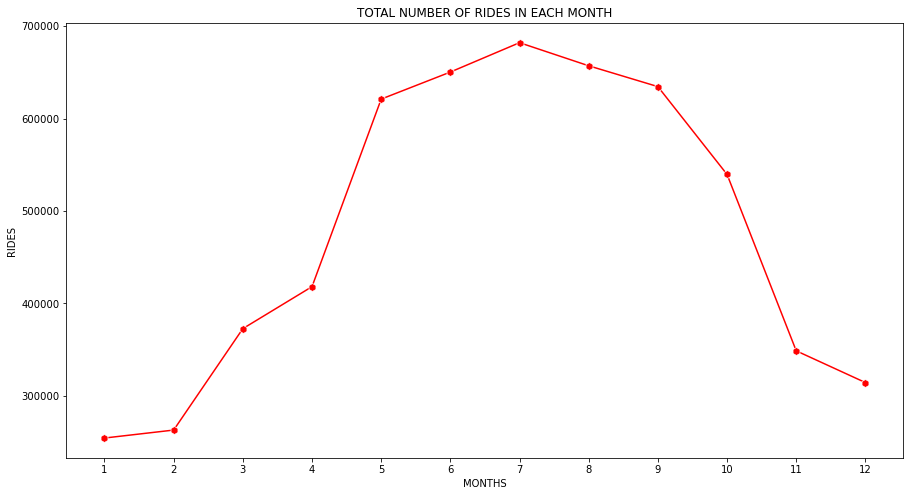

In [444]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = ride_per_month["months"], y = ride_per_month["rides"], color = "r", marker= "h", markersize = 8)
plt.xticks(ride_per_month["months"])
plt.xlabel("MONTHS")
plt.ylabel("RIDES")
plt.title("TOTAL NUMBER OF RIDES IN EACH MONTH")
plt.show()

### iii) THE TOTAL NUMBER OF RIDES BY DAY

**NOTE:** 1 = MONDAY, 2 = TUESDAY, 3 = WEDNESDAY, 4 = THURSDAY, 5 = FRIDAY, 6 = SATURDAY, 7 = SUNDAY

In [441]:
ride_by_day = pd.DataFrame(all_data["day_of_week"].value_counts()).reset_index()
ride_by_day 

,index,day_of_week
0,6,939671
1,4,839620
2,5,815654
3,3,805051
4,7,792931
5,2,788110
6,1,774657


In [442]:
ride_by_day.rename({"index": "Days", "day_of_week": "Rides"}, axis = 1, inplace = True)

In [443]:
ride_by_day

,Days,Rides
0,6,939671
1,4,839620
2,5,815654
3,3,805051
4,7,792931
5,2,788110
6,1,774657


In [448]:
all_data.groupby("day_of_week").count()["rideable_type"]  #CAN ALSO BE DONE WITH THE GROUPBY AND COUNT FUNCTIONS

day_of_week
1    774657
2    788110
3    805051
4    839620
5    815654
6    939671
7    792931
Name: rideable_type, dtype: int64

### PLOTING THE TOTAL NUMBER OF RIDES BY DAY

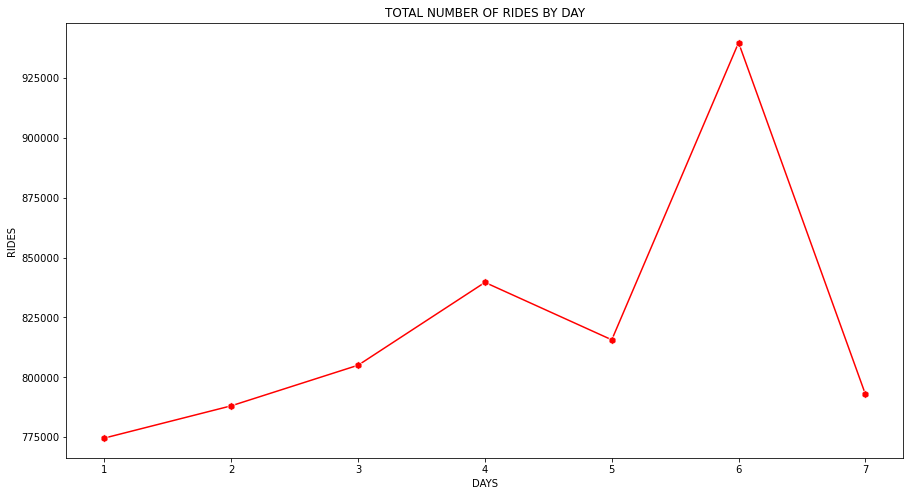

In [641]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = ride_by_day["Days"], y = ride_by_day["Rides"], color = "r", marker= "h", markersize = 8)
plt.xticks(ride_by_day["Days"])
plt.xlabel("DAYS")
plt.ylabel("RIDES")
plt.title("TOTAL NUMBER OF RIDES BY DAY")
plt.show()

### iv) WHAT IS THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE BY DAY?

In [449]:
all_data.groupby(["day_of_week", "member_casual"]).count()[["rideable_type"]]

rideable_type
day_of_week member_casual               
1           casual                284971
            member                489686
2           casual                264399
            member                523711
3           casual                275394
            member                529657
4           casual                306950
            member                532670
5           casual                338959
            member                476695
6           casual                485281
            member                454390
7           casual                397079
            member                395852

### PLOTTING THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE BY DAY?

Text(0, 0.5, 'NUMBER OF RIDES')

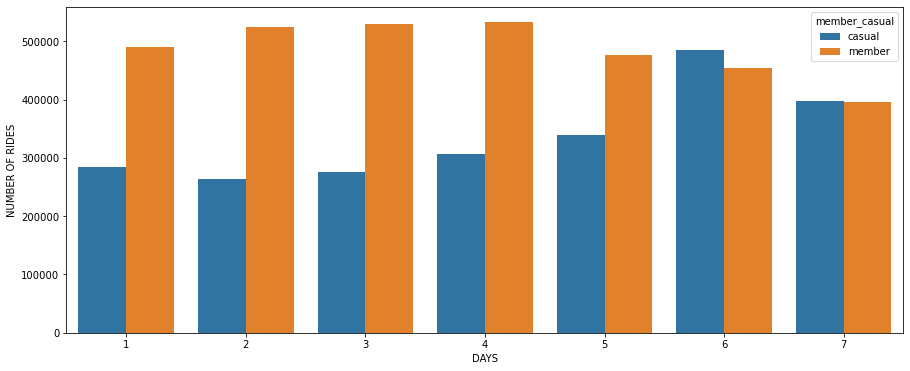

In [642]:
plt.figure(figsize = (15, 6))
sns.countplot(x = all_data["day_of_week"], hue = all_data["member_casual"])
plt.xlabel("DAYS")
plt.ylabel("NUMBER OF RIDES")

### V) WHAT IS THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE BY MONTH?

In [451]:
all_data.groupby(["months", "member_casual"]).count()[["rideable_type"]]

rideable_type
months member_casual               
1      casual                 83156
       member                171134
2      casual                 91736
       member                171176
3      casual                142041
       member                230644
4      casual                157958
       member                260146
5      casual                283624
       member                337439
6      casual                300013
       member                350319
7      casual                312904
       member                369205
8      casual                284562
       member                372544
9      casual                258906
       member                375667
10     casual                207904
       member                331643
11     casual                119663
       member                228990
12     casual                110566
       member                203754

### PLOTTING THE TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE BY MONTH?

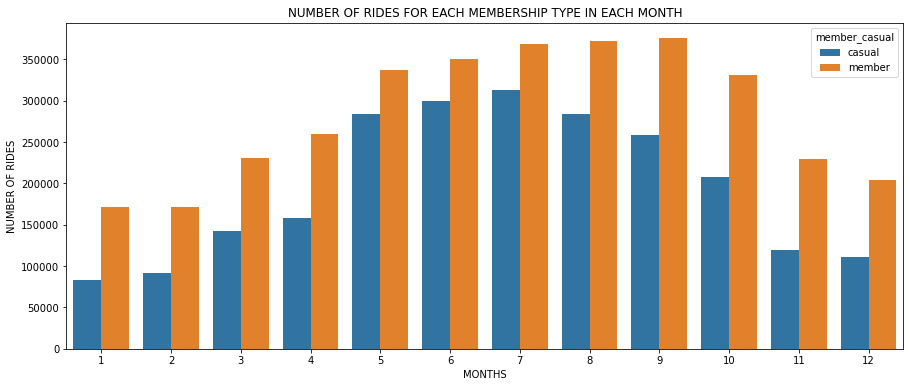

In [452]:
plt.figure(figsize = (15, 6))
sns.countplot(x = all_data["months"], hue = all_data["member_casual"])
plt.xlabel("MONTHS")
plt.ylabel("NUMBER OF RIDES")
plt.title("NUMBER OF RIDES FOR EACH MEMBERSHIP TYPE IN EACH MONTH")
plt.show()

### vi) ANALYZING THE BIKE PREFERENCES BY USER TYPE?

In [458]:
all_data.groupby(["rideable_type", "member_casual"] ). count()[["started_at"]].rename({"started_at":"rides"}, axis = 1)

rides
rideable_type member_casual         
classic_bike  casual          897427
              member         1740510
docked_bike   casual          182205
electric_bike casual         1273401
              member         1662151

### PLOTTING THE BIKE PREFERENCES BY USER TYPE

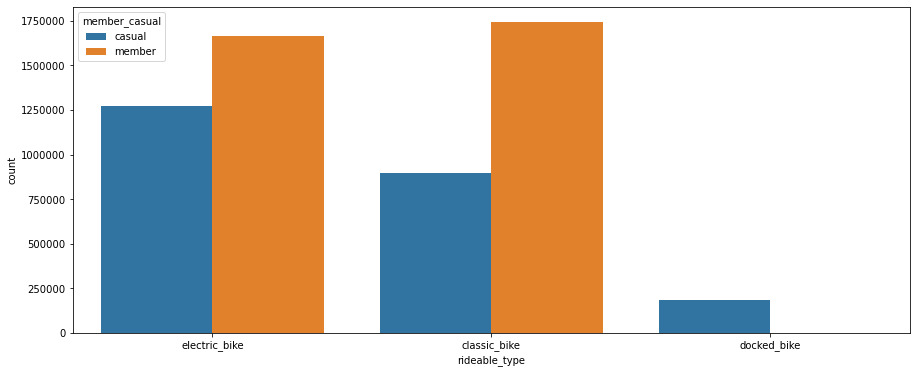

In [460]:
plt.figure(figsize = (15, 6))
sns.countplot(x = all_data["rideable_type"], hue = all_data["member_casual"])
plt.ticklabel_format(useOffset=False,style='plain', axis='y')

## vii) TOP 5 START AND END STATIONS BY USER TYPE

In [480]:
start_station_mem = all_data[all_data["member_casual"] == "member"][["start_station_name"]].value_counts().head()
start_station_cas = all_data[all_data["member_casual"] == "casual"][["start_station_name"]].value_counts().head()

In [482]:
end_station_mem = all_data[all_data["member_casual"] == "member"][["end_station_name"]].value_counts().head()
end_station_cas = all_data[all_data["member_casual"] == "casual"][["end_station_name"]].value_counts().head()

#### TOP 5 START STATIONS FOR YEARLY MEMBERS

In [502]:
start_station_mem

start_station_name      
Kingsbury St & Kinzie St    25800
Clark St & Elm St           22665
Wells St & Concord Ln       21896
University Ave & 57th St    20360
Ellis Ave & 60th St         20015
dtype: int64

#### TOP 5 END STATIONS FOR YEARLY MEMBERS

In [571]:
end_station_mem

end_station_name            
Kingsbury St & Kinzie St        25277
Clark St & Elm St               23046
Wells St & Concord Ln           22490
University Ave & 57th St        21116
Clinton St & Washington Blvd    20635
dtype: int64

#### TOP 5 START STATIONS FOR YEARLY MEMBERS

In [570]:
start_station_cas

start_station_name                
Streeter Dr & Grand Ave               58383
DuSable Lake Shore Dr & Monroe St     32598
Millennium Park                       25990
Michigan Ave & Oak St                 25327
DuSable Lake Shore Dr & North Blvd    23792
dtype: int64

#### TOP 5 END STATIONS FOR CASUAL MEMBERS

In [486]:
end_station_cas

end_station_name                  
Streeter Dr & Grand Ave               60256
DuSable Lake Shore Dr & Monroe St     30012
Millennium Park                       27185
Michigan Ave & Oak St                 26599
DuSable Lake Shore Dr & North Blvd    26253
dtype: int64

## viii) ANALYZING THE TOTAL NUMBER OF EACH BIKE TYPE USED BY EACH MEMBERSHIP TYPE EVERY MONTH 

In [553]:
ii = all_data.groupby(["rideable_type", "months", "member_casual" ]).count()[["started_at"]].reset_index()

In [555]:
ii.head()

,rideable_type,months,member_casual,started_at
0,classic_bike,1,casual,30554
1,classic_bike,1,member,91535
2,classic_bike,2,casual,35365
3,classic_bike,2,member,90561
4,classic_bike,3,casual,53487


In [556]:
ii.rename({"rideable_type": "Bike Type", "months": "Months", "member_casual": "Membership Type", "started_at": "Number of Rides"}, axis = 1, inplace = True)

In [557]:
ii.head()

,Bike Type,Months,Membership Type,Number of Rides
0,classic_bike,1,casual,30554
1,classic_bike,1,member,91535
2,classic_bike,2,casual,35365
3,classic_bike,2,member,90561
4,classic_bike,3,casual,53487


#### TOTAL NUMBER OF RIDES IN EACH MONTH USING ELECTRIC BIKES BY EACH MEMBERHIP TYPE

In [546]:
ii_elec = ii[ii["Bike Type"] == "electric_bike"]
ii_elec

,Bike Type,Months,Membership Type,Number of Rides
36,electric_bike,1,casual,46900
37,electric_bike,1,member,79599
38,electric_bike,2,casual,49375
39,electric_bike,2,member,80615
40,electric_bike,3,casual,76131
41,electric_bike,3,member,115598
42,electric_bike,4,casual,84010
43,electric_bike,4,member,131323
44,electric_bike,5,casual,130125
45,electric_bike,5,member,148744


#### TOTAL NUMBER OF RIDES IN EACH MONTH USING CLASSIC BIKES BY EACH MEMBERHIP TYPE

In [564]:
ii_classic = ii[ii["Bike Type"] == "classic_bike"]
ii_classic

,Bike Type,Months,Membership Type,Number of Rides
0,classic_bike,1,casual,30554
1,classic_bike,1,member,91535
2,classic_bike,2,casual,35365
3,classic_bike,2,member,90561
4,classic_bike,3,casual,53487
5,classic_bike,3,member,115046
6,classic_bike,4,casual,59752
7,classic_bike,4,member,128823
8,classic_bike,5,casual,126695
9,classic_bike,5,member,188695


#### TOTAL NUMBER OF RIDES IN EACH MONTH USING DOCKED BIKES BY EACH MEMBERHIP TYPE

In [550]:
ii_dock = ii[ii["Bike Type"] == "docked_bike"]
ii_dock

,Bike Type,Months,Membership Type,Number of Rides
24,docked_bike,1,casual,5702
25,docked_bike,2,casual,6996
26,docked_bike,3,casual,12423
27,docked_bike,4,casual,14196
28,docked_bike,5,casual,26804
29,docked_bike,6,casual,23648
30,docked_bike,7,casual,22370
31,docked_bike,8,casual,20710
32,docked_bike,9,casual,17352
33,docked_bike,10,casual,14073


### PLOTTING THE TOTAL NUMBER OF RIDES IN EACH MONTH BY MEMBERSHIP TYPE USING EACH BKE TYPE

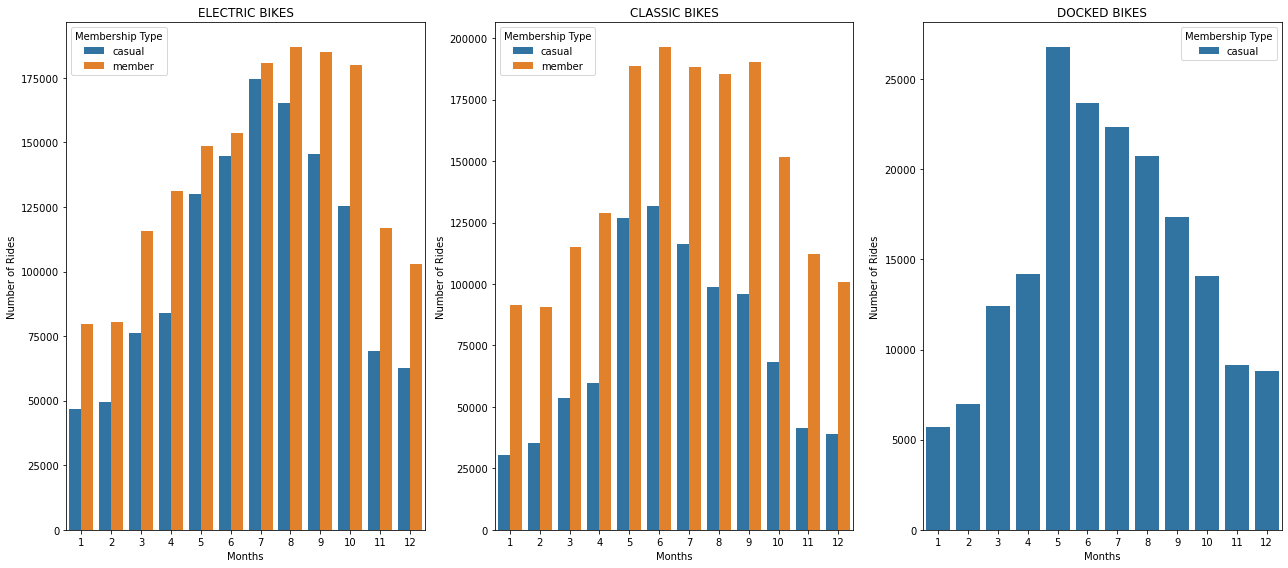

In [561]:
fig, axs = plt.subplots(ncols=3, figsize = (18,8))

axs[0].set_title("ELECTRIC BIKES")
axs[1].set_title("CLASSIC BIKES")
axs[2].set_title("DOCKED BIKES")


sns.barplot(x = ii_elec["Months"], y = ii_elec["Number of Rides"], hue = ii["Membership Type"], ax=axs[0])
sns.barplot(x = ii_classic["Months"], y = ii_classic["Number of Rides"], hue = ii_classic["Membership Type"], ax=axs[1])
sns.barplot(x = ii_dock["Months"], y = ii_dock["Number of Rides"], hue = ii_dock["Membership Type"], ax=axs[2])

plt.tight_layout()

# 5. SHARE

The share phase of the data analysis process involves creating and sharing **high level visualizations** about your findings to stakeholders.
For the sake of this project, i have already shared visualizations for every analysis done above. Below are the findings i have made based on all my analysis from each questions posed from the ask phase:

**1.TOTAL NUMBER OF RIDES COMPLETED BY EACH USER TYPE?**
- Based on the total number of rides, Cyclistic bike-share has slightly more number yearly members (3,402,661) than casual riders. The yearly members make up 59.1% and the casual riders make up 41.9%.


**2. TOTAL NUMBER OF RIDES IN EACH MONTH**
- The analysis shows that june, july and august are the busiest month. This could be as a result of those months being summer months, where the weather is sunny, people feel like going out more and th weather is genrally more condusive for bike rides.

**3. TOTAL NUMBER OF RIDES BY DAY?**
- The analysis of the total number of days shows Mondays having the least ammount of rides then a steady daily increase in rides to thursday, then a slight drop on friday, thereafter, the number of rides peaked on saturday and then dropped on saturday.
The low number of rides on monday might be because of the busy start of the week, with most riders going to work, while the surge on saturday might indicate the usual saturday outdorr rest days.

**4. DAILY RIDE COMAPRISON BETWEEN THE TWO BIKE USERS** 
- This analysis shows a rather consistent usage of bikes by the yearly members throughout the week, whereas, the casual users had a significantly lower number of rides during the week and a higher number of rides during the weekend with a suprisingly Higher number of rides on Saturday and Sunday as compared to the yearly members. This might indicate that the yearly members use the bikes as a means of daily transportation maybe to their places of work, and the casual users use the bikes as a means of leisure during the weekends hence the surge on Saturday and Sunday.

**5. MONTHLY RIDE COMAPRISON BETWEEN THE TWO BIKE USERS**
- In this analysis, the yearly members used more bikes every month throughout the year than the casual memnbers. However both showed a steaddy increase, and individually peaked during the summer months. After the summer months, There is a decline. This suggests that both users enjoy and use cyclists more in the summer months.

**6. BIKE PREFERENCES BETWEEN BOTH USERS.**
- The analysis shows that overall, the yearly membship users prefer to use the classic bikes more than every other bike types, the reason could be because of the ease of use in terms of the battery capacity of the electric bikes and then the stressful need of not docking the bikes at docking stations. Whereas, the casual users prefer to use the electric bikes more than the other bike types, the reason they might not choose the classic bikes instead might be as a result of pricing, however the pricing informations were not provided.




# 6. ACT

The act phase of the data analysis process involves sharing **recommendations** based on your finding to your stakeholder, so that The stake holder will then use those recommendations to take actions that will lead to positive results.

** My recommendations that would help to convert casual users into yearly memberhip users are: **

- i) Make a yearly subscription plan for just weekend rides and increase the casual usage prices for weekends only.

    
- ii) Create a subcription plan for usuage during the warmer months. Adverts for this plan should run during the winter months.

    
- iii) Reduce the availability of Electric bikes for casual usage and make the price for casual usage of classic bikes higher. However, an incentive such as a discount for yearly membership plan should be set in place 
